# Graph alignment

In this notebook we show how to use the GOT algorithm on a toy example. The functions used here are located in the stochastic.py file. If you have two graphs and want to recover an alignment, you should use find_permutation().
Note that there are several parameters to adjust in our algorithm. The exact parameters to reproduce our experiments are reported in the paper.

In [1]:
from stochastic import *
import random

## Stochastic block model

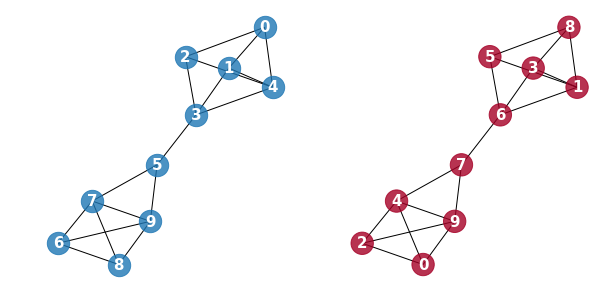

In [2]:
n = 10
blocks = [int(n/2),int(n/2)]
probs = [[0.7,0.05],[0.05,0.7]]

[sbm_x, sbm_y, sbm_P_true] = create_test_graphs(n, blocks, probs, graph_type = 'sbm', seed_nb = 200)

plot_graphs_ch(sbm_x, sbm_y, sbm_P_true)

## Alignment

[Epoch    1/600] loss: 2.549788 - std: 10.050399
[Epoch  100/600] loss: 0.305443 - std: 6.923968
[Epoch  200/600] loss: 0.124840 - std: 5.322808
[Epoch  300/600] loss: 0.088922 - std: 4.571495
[Epoch  400/600] loss: 0.023888 - std: 4.091300
[Epoch  500/600] loss: 0.030073 - std: 3.924867
[Epoch  600/600] loss: 0.023333 - std: 3.798886


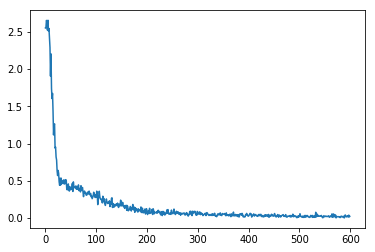

In [3]:
sbm_x_inv, sbm_y_inv, sbm_P = find_permutation(sbm_x, sbm_y, it=10, tau=2, n_samples=20, epochs=600, lr=0.5, 
                                               loss_type = 'w', alpha = 0.1, ones = True)

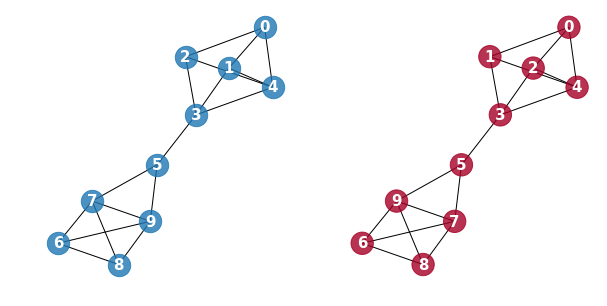

In [4]:
plot_graphs_ch(sbm_x, sbm_y, sbm_P_true, sbm_P)

Notice that the laplacian matrices `x` and `P.T @ y @ P` are exactly the same (the third column shows the difference), meaning that the recovered permutation aligns the graph perfectly to the original, even though it may not be the same as the original permutation.

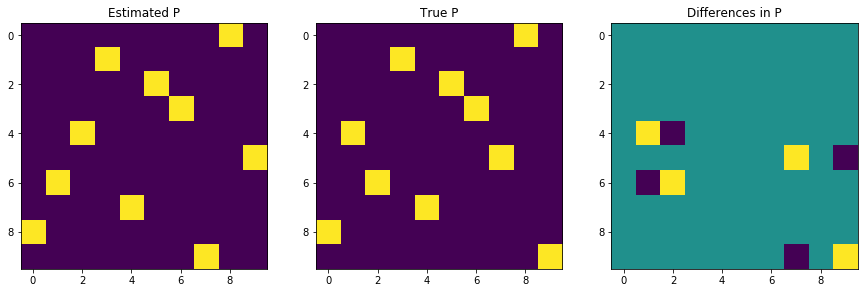

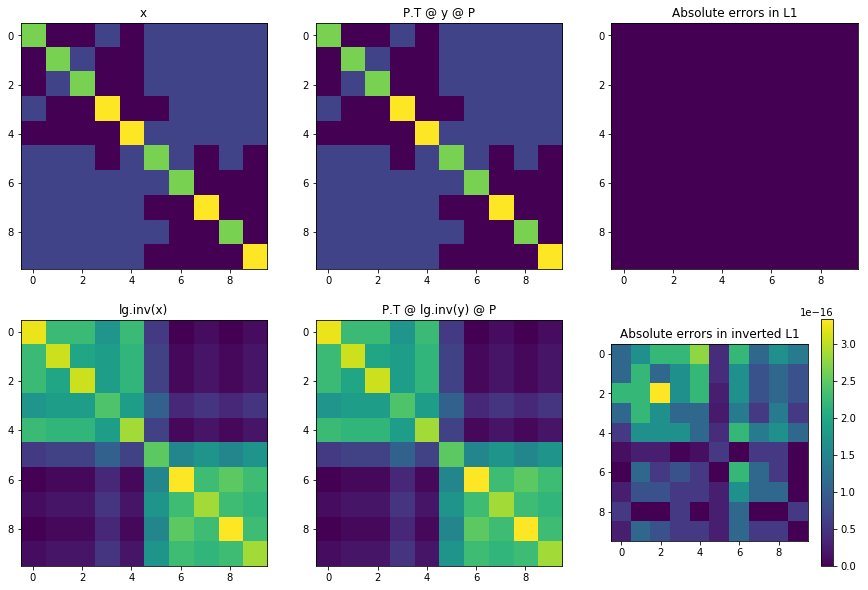

In [5]:
plot_everything(sbm_x, sbm_y, sbm_x_inv, sbm_y_inv, sbm_P, sbm_P_true)

## Other graphs



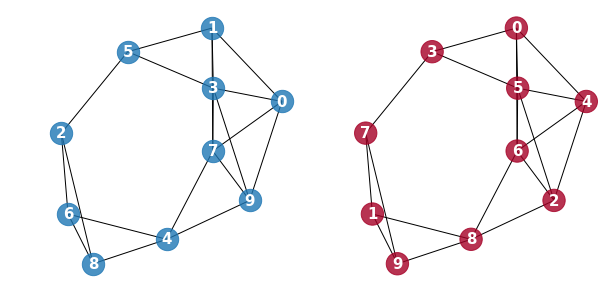

In [ ]:
random.seed(20)

[x, y, P_true] = create_test_graphs(10, graph_type = 'geo') # 'er' or 'geo'

plot_graphs_ch(x, y, P_true)

In [ ]:
x_inv, y_inv, P = find_permutation(x, y, it=10, tau=1, n_samples=20, epochs=500, lr=0.5, 
                                   loss_type = 'l2', alpha = 0.1, ones = True)

[Epoch    1/500] loss: 0.862670 - std: 9.999986
[Epoch  100/500] loss: 0.048506 - std: 4.314502
[Epoch  200/500] loss: 0.000327 - std: 2.979845


In [ ]:
plot_graphs_ch(x, y, P_true, P)

Notice that the laplacian matrices `x` and `P.T @ y @ P` are exactly the same (the third column shows the difference), meaning that the recovered permutation aligns the graph perfectly to the original, even though it may not be the same as the original permutation.

In [ ]:
plot_everything(x, y, x_inv, y_inv, P, P_true)